# Projek Pertama Machine Learning Terapan - Cindy Alya Putri

## Latar belakang

Anemia merupakan kondisi kekurangan hemoglobin dalam darah yang menyebabkan tubuh kekurangan oksigen. Masalah ini umum terjadi dan berdampak serius terhadap kesehatan, terutama pada wanita hamil dan anak-anak. WHO melaporkan bahwa lebih dari 40% wanita hamil dan anak balita di dunia mengalami anemia [1].

Proses diagnosis anemia biasanya dilakukan dengan analisis laboratorium terhadap parameter darah seperti Hemoglobin, MCH, MCHC, dan MCV. Namun, analisis manual memiliki keterbatasan, seperti waktu yang lama dan potensi ketidakkonsistenan antar tenaga medis.

Oleh karena itu, dibutuhkan pendekatan yang lebih cepat dan akurat. Machine learning menjadi solusi yang potensial karena mampu mengolah data medis dan memberikan prediksi diagnosis secara otomatis. Ramzan et al. (2024) mengembangkan model berbasis attention mechanism yang meningkatkan akurasi deteksi anemia [2]. Penelitian lain oleh Dhakal et al. (2023) dan Asare et al. (2023) juga menunjukkan bahwa algoritma seperti Random Forest dan SVM efektif dalam klasifikasi anemia [3][4].

Dengan pendekatan ini, sistem klasifikasi anemia berbasis machine learning diharapkan dapat membantu proses diagnosis menjadi lebih efisien, akurat, dan mendukung pengambilan keputusan medis secara objektif.



## Mengimport library yang dibutuhkan

In [ ]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report ,f1_score , precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Data Loading

Dataset yang digunakan merupakan dataset yang berasal dari kaggle, yang diterbitkan oleh Biswa Ranjan Rao dengan judul Anemia Dataset. Dataset ini memiliki 1421 baris dan 6 kolom dengan total 6 fitur yang terdiri dari 5 fitur independen dan 1 fitur dependen atau label. jenis data dari dataset bertipe kuantitatif.

In [ ]:
# Download latest version
path = kagglehub.dataset_download("biswaranjanrao/anemia-dataset")

print("Path to dataset files:", path)

100%|██████████| 4.61k/4.61k [00:00<00:00, 6.21MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/biswaranjanrao/anemia-dataset/versions/1


In [ ]:
DATA_DIR = f'{path}/{os.listdir(path)[0]}'
df = pd.read_csv(DATA_DIR)

# Exploratory Data Analysis (EDA)

## Melihat kolom dan tipe data dari kolom pada dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


dataset ini berjenis data kuantitatif, dimana hal tersebut terbukti dari data yang memiliki tipe data float64 dan Int64. terdapat 1421 entri data di dalam dataset serta terdapat 6 kolom di dalamnya.

## Melihat 5 data teratas pada Dataset

In [ ]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


Tabel tersebut adalah contoh 5 data pertama dari dataset

# Melihat statistik deskriptif

In [ ]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


Tabel di atas menunjukkan statistik deskriptif dari setiap kolom dalam dataset. Informasi seperti count (jumlah data), mean (rata-rata), std (simpangan baku), serta min, max, dan kuartil digunakan untuk melihat sebaran data.

Sebagian besar kolom memiliki distribusi nilai yang normal. Namun, pada kolom seperti Hemoglobin, MCV, dan MCH terlihat adanya rentang nilai yang cukup lebar dan standar deviasi yang tinggi, yang mengindikasikan kemungkinan adanya outlier. Oleh karena itu, perlu dilakukan analisis lanjutan seperti visualisasi boxplot untuk memastikan dan menangani outlier sebelum proses modeling.

## Membuat visualisasi boxplot untuk mengidentifikasi Outlier pada tiap kolom dalam dataset

3 2


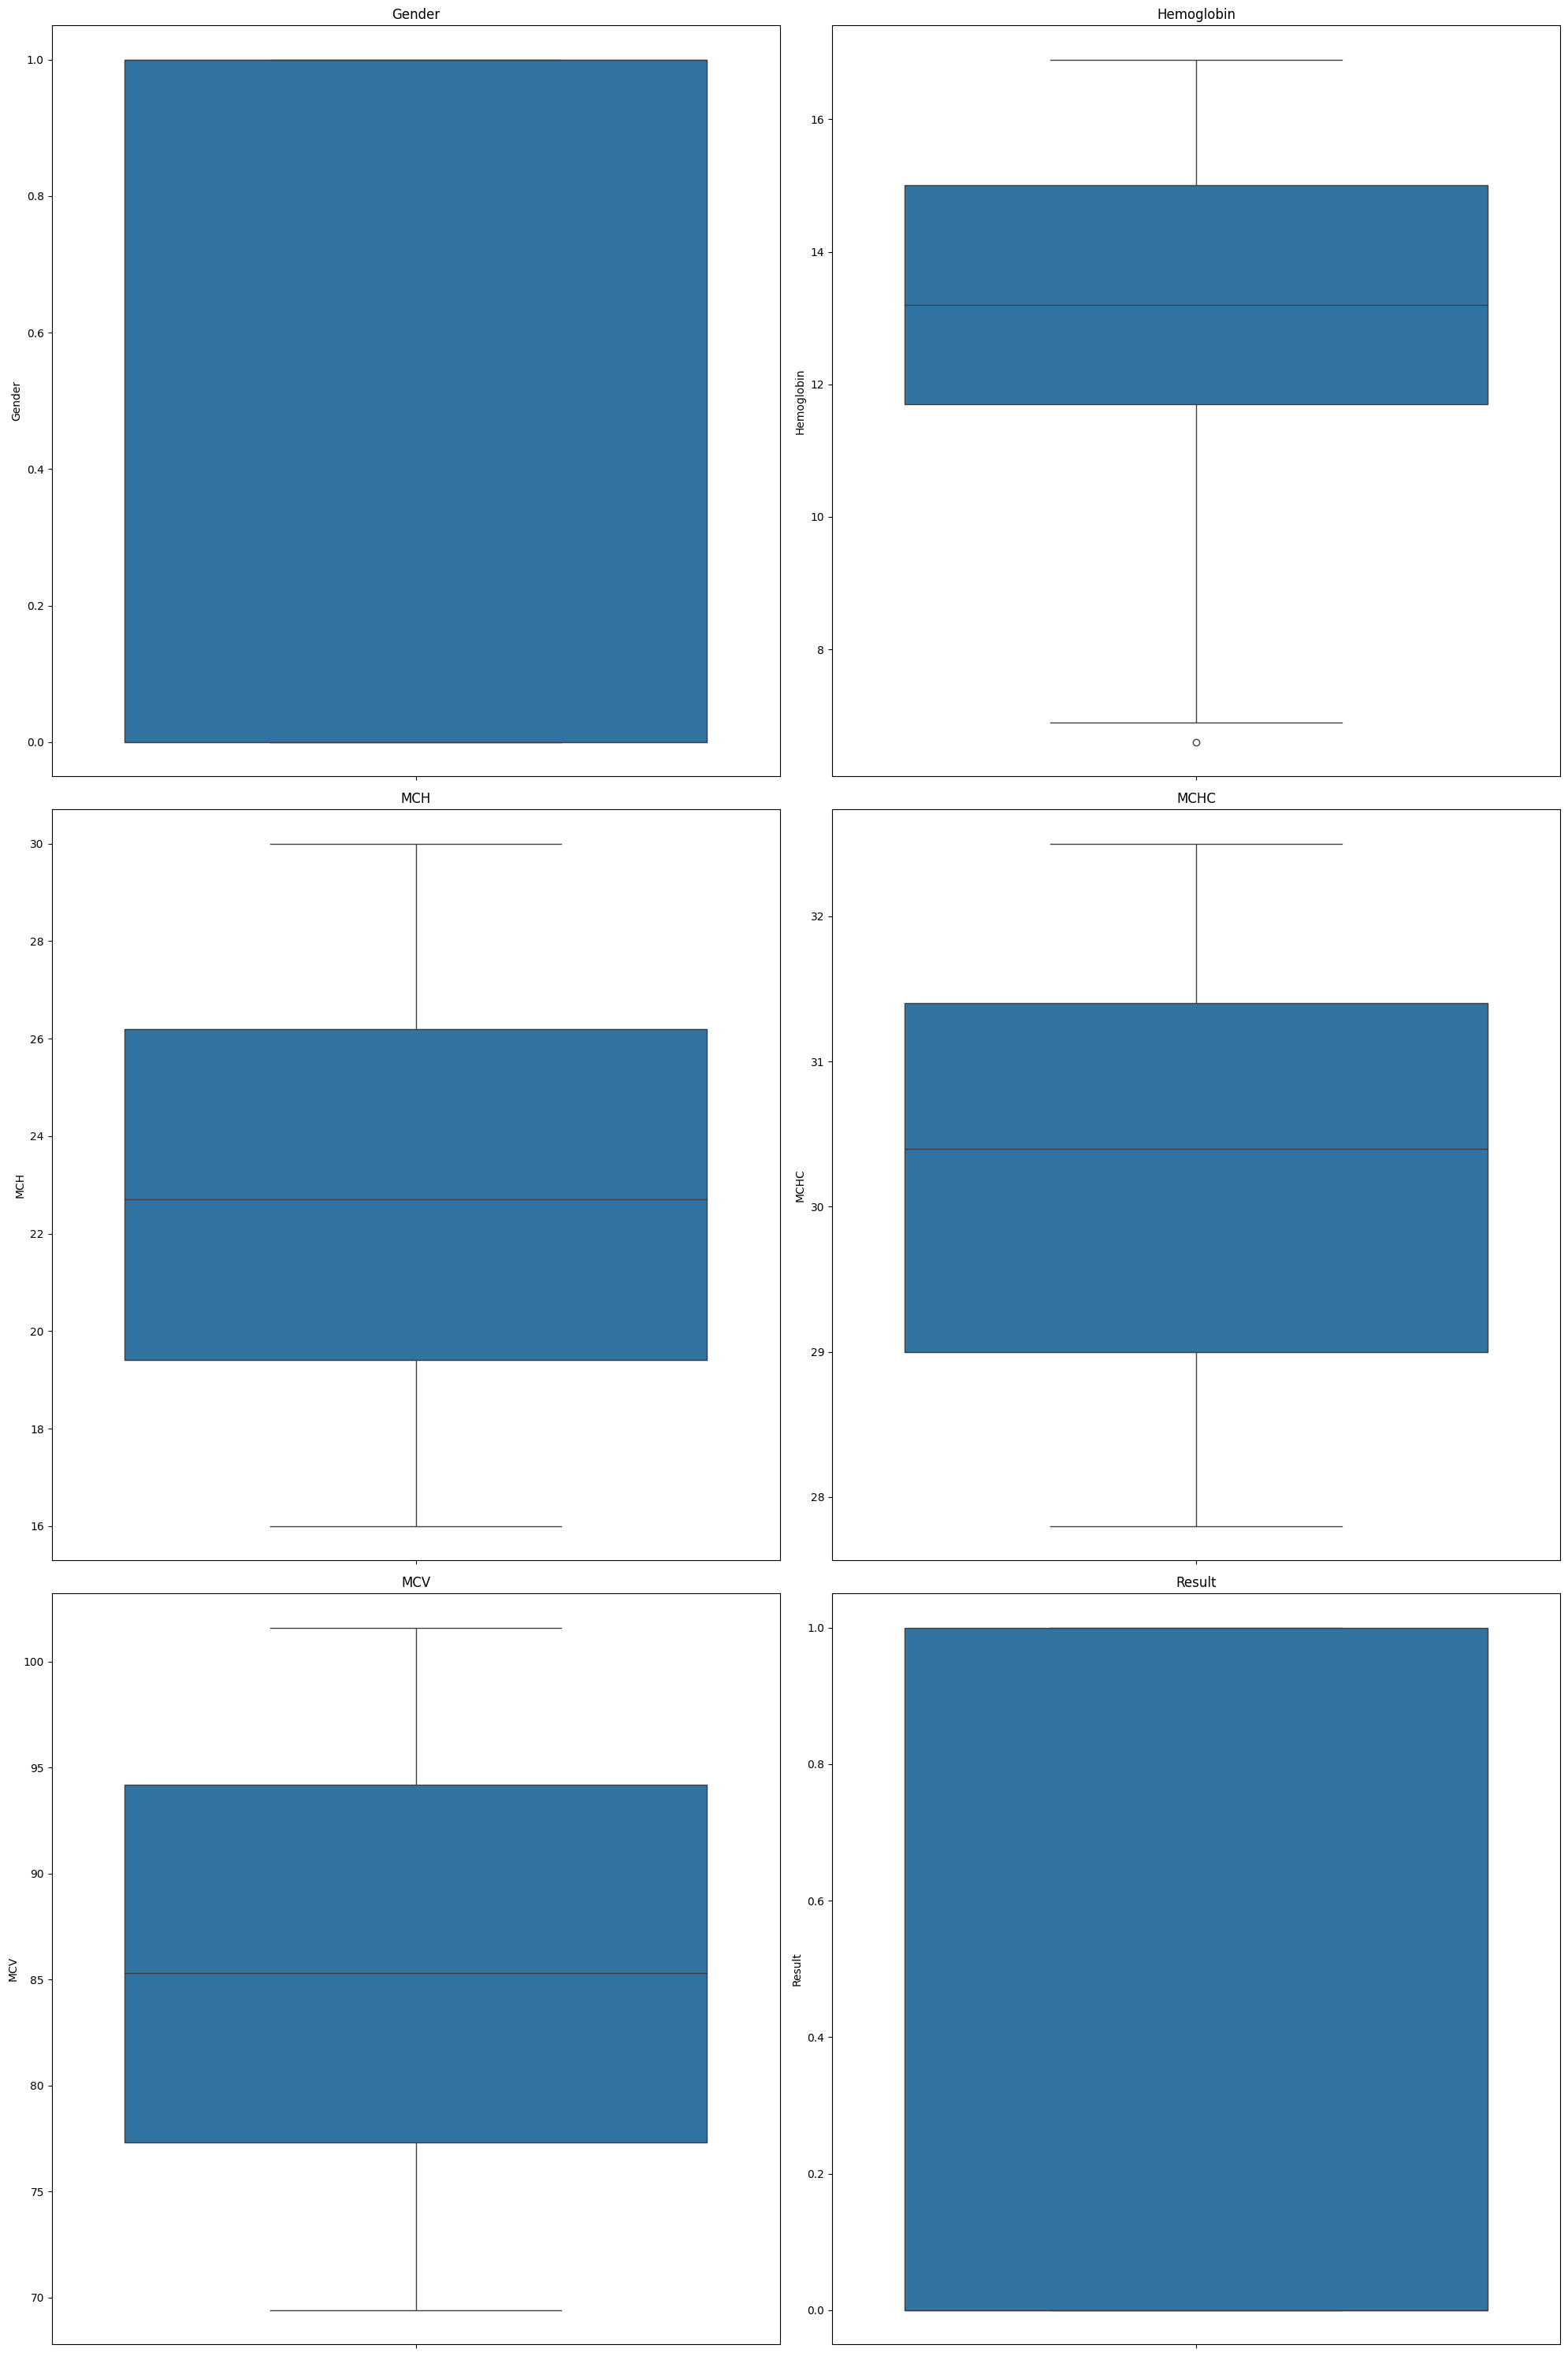

In [ ]:
def show_boxplots(df):
  rows = int(np.ceil(np.sqrt(len(df.columns))))
  cols = int(np.ceil(len(df.columns) / rows))
  print(rows,cols)
  fig, ax = plt.subplots(rows, cols, figsize=(10*cols, 10*rows))
  ax = ax.flatten()
  for (idx , feature) in enumerate(df.columns):
    sns.boxplot(df[feature], ax=ax[idx])
    ax[idx].set_title(feature)

  for j in range(idx + 1, len(ax)):
      fig.delaxes(ax[j])
  plt.tight_layout()
  plt.show()

show_boxplots(df)

Visualisasi boxplot di atas digunakan untuk melihat distribusi nilai dan mendeteksi kemungkinan adanya outlier. Dari hasil visualisasi, sebagian besar kolom seperti MCH, MCHC, dan MCV tidak menunjukkan adanya outlier yang mencolok. Namun, pada kolom Hemoglobin terlihat terdapat satu nilai yang berada jauh di bawah rentang utama data.

Meskipun secara statistik nilai tersebut termasuk outlier, saya memutuskan tidak menghapusnya. Hal ini karena nilai ekstrem tersebut justru dapat merepresentasikan kondisi anemia berat, yang penting untuk dipertahankan dalam konteks analisis. Menghapus outlier seperti ini dapat mengurangi variasi dan representasi kasus nyata dalam data, sehingga akan mempengaruhi akurasi dan generalisasi model yang dikembangkan.

## Mengecek nilai kosong di dalam setiap kolom pada dataset

In [ ]:
df.isna().sum()

,0
Gender,0
Hemoglobin,0
MCH,0
MCHC,0
MCV,0
Result,0


Dari tabel terlihat tida adanya missing value sehingga tidak perlu dilakukan tindakan lebih lanjut

## Mengecek nilai duplikat pada setiap kolom di dalam dataset

In [ ]:
df.duplicated().sum()


np.int64(887)

Terdapat 887 data duplikat sehingga diperlukan analisis lanjutan apakah data memang harus dihapus atau dipertahankan

In [ ]:
df[df.duplicated()].head()


,Gender,Hemoglobin,MCH,MCHC,MCV,Result
237,1,14.9,22.7,29.1,83.7,0
238,0,15.9,25.4,28.3,72.0,0
240,0,14.9,16.0,31.4,87.5,0
242,0,11.6,22.3,30.9,74.5,1
243,1,12.7,19.5,28.9,82.9,1


Berdasarkan hasil analisis terhadap dataset, ditemukan bahwa sebanyak 887 dari 1421 baris (sekitar 62%) merupakan duplikat total, yaitu baris yang memiliki nilai identik di seluruh kolom. Hal ini terlihat dari hasil df[df.duplicated()], yang menunjukkan bahwa beberapa entri benar-benar sama, baik dari sisi fitur maupun label hasil diagnosis (Result).

Penghapusan data duplikat ini perlu dilakukan dengan pertimbangan bahwa:

* Baris-baris tersebut tidak menambah informasi baru, karena datanya persis sama dengan baris lain.
* Keberadaan data identik dalam jumlah besar dapat menyebabkan bias pada model machine learning, karena model akan lebih sering belajar dari pola yang diulang-ulang.
* Menghapus duplikat membantu meningkatkan efisiensi komputasi dan membuat analisis menjadi lebih representatif terhadap variasi data asli.

Namun, keputusan ini juga mempertimbangkan risiko pengurangan jumlah data. Setelah dihapus, data berkurang menjadi sekitar 534 baris unik, yang masih dianggap cukup untuk proses eksplorasi dan modeling awal, meskipun tetap perlu diuji kestabilan performa modelnya.

Dengan demikian, penghapusan data duplikat dilakukan untuk menjaga kualitas dan keakuratan analisis, tanpa mengorbankan keberagaman informasi yang ada dalam dataset.


## Membuat Pie Chart untuk visualisasi distribusi kelas atau label pada dataset

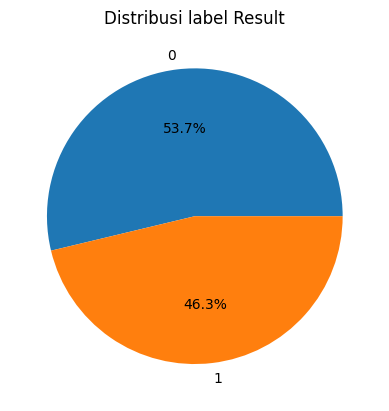

In [ ]:
plt.pie(df['Result'].value_counts(), labels = df['Result'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribusi label Result')
plt.show()

## Membuat Bar Chart untuk visualisasi distribusi kelas atau label pada dataset

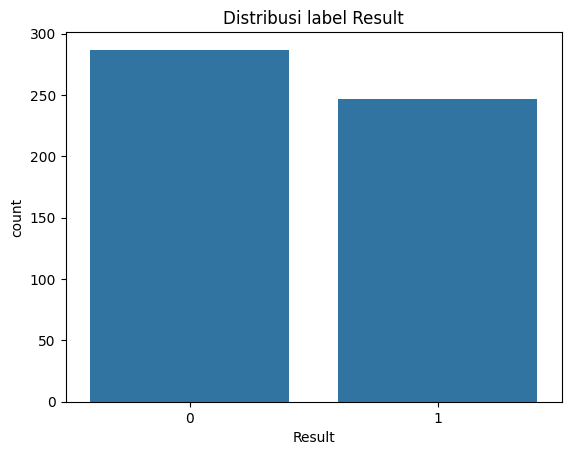

In [ ]:
sns.countplot(x='Result', data=df)
plt.title('Distribusi label Result')
plt.show()

Dari hasil visualisasi di atas dapat terlihat distribusi label pada dataset menunjukkan proporsi yang cukup seimbang antara kelas negatif dan positif anemia. Oleh karena itu, teknik augmentasi data tidak menjadi kebutuhan utama dalam tahap awal pemodelan. Penggunaan augmentasi justru dapat menimbulkan risiko jika tidak dikontrol dengan baik

## Membuat grafik histogram untuk mengidentifikasi distribusi data dari setiap kolom.

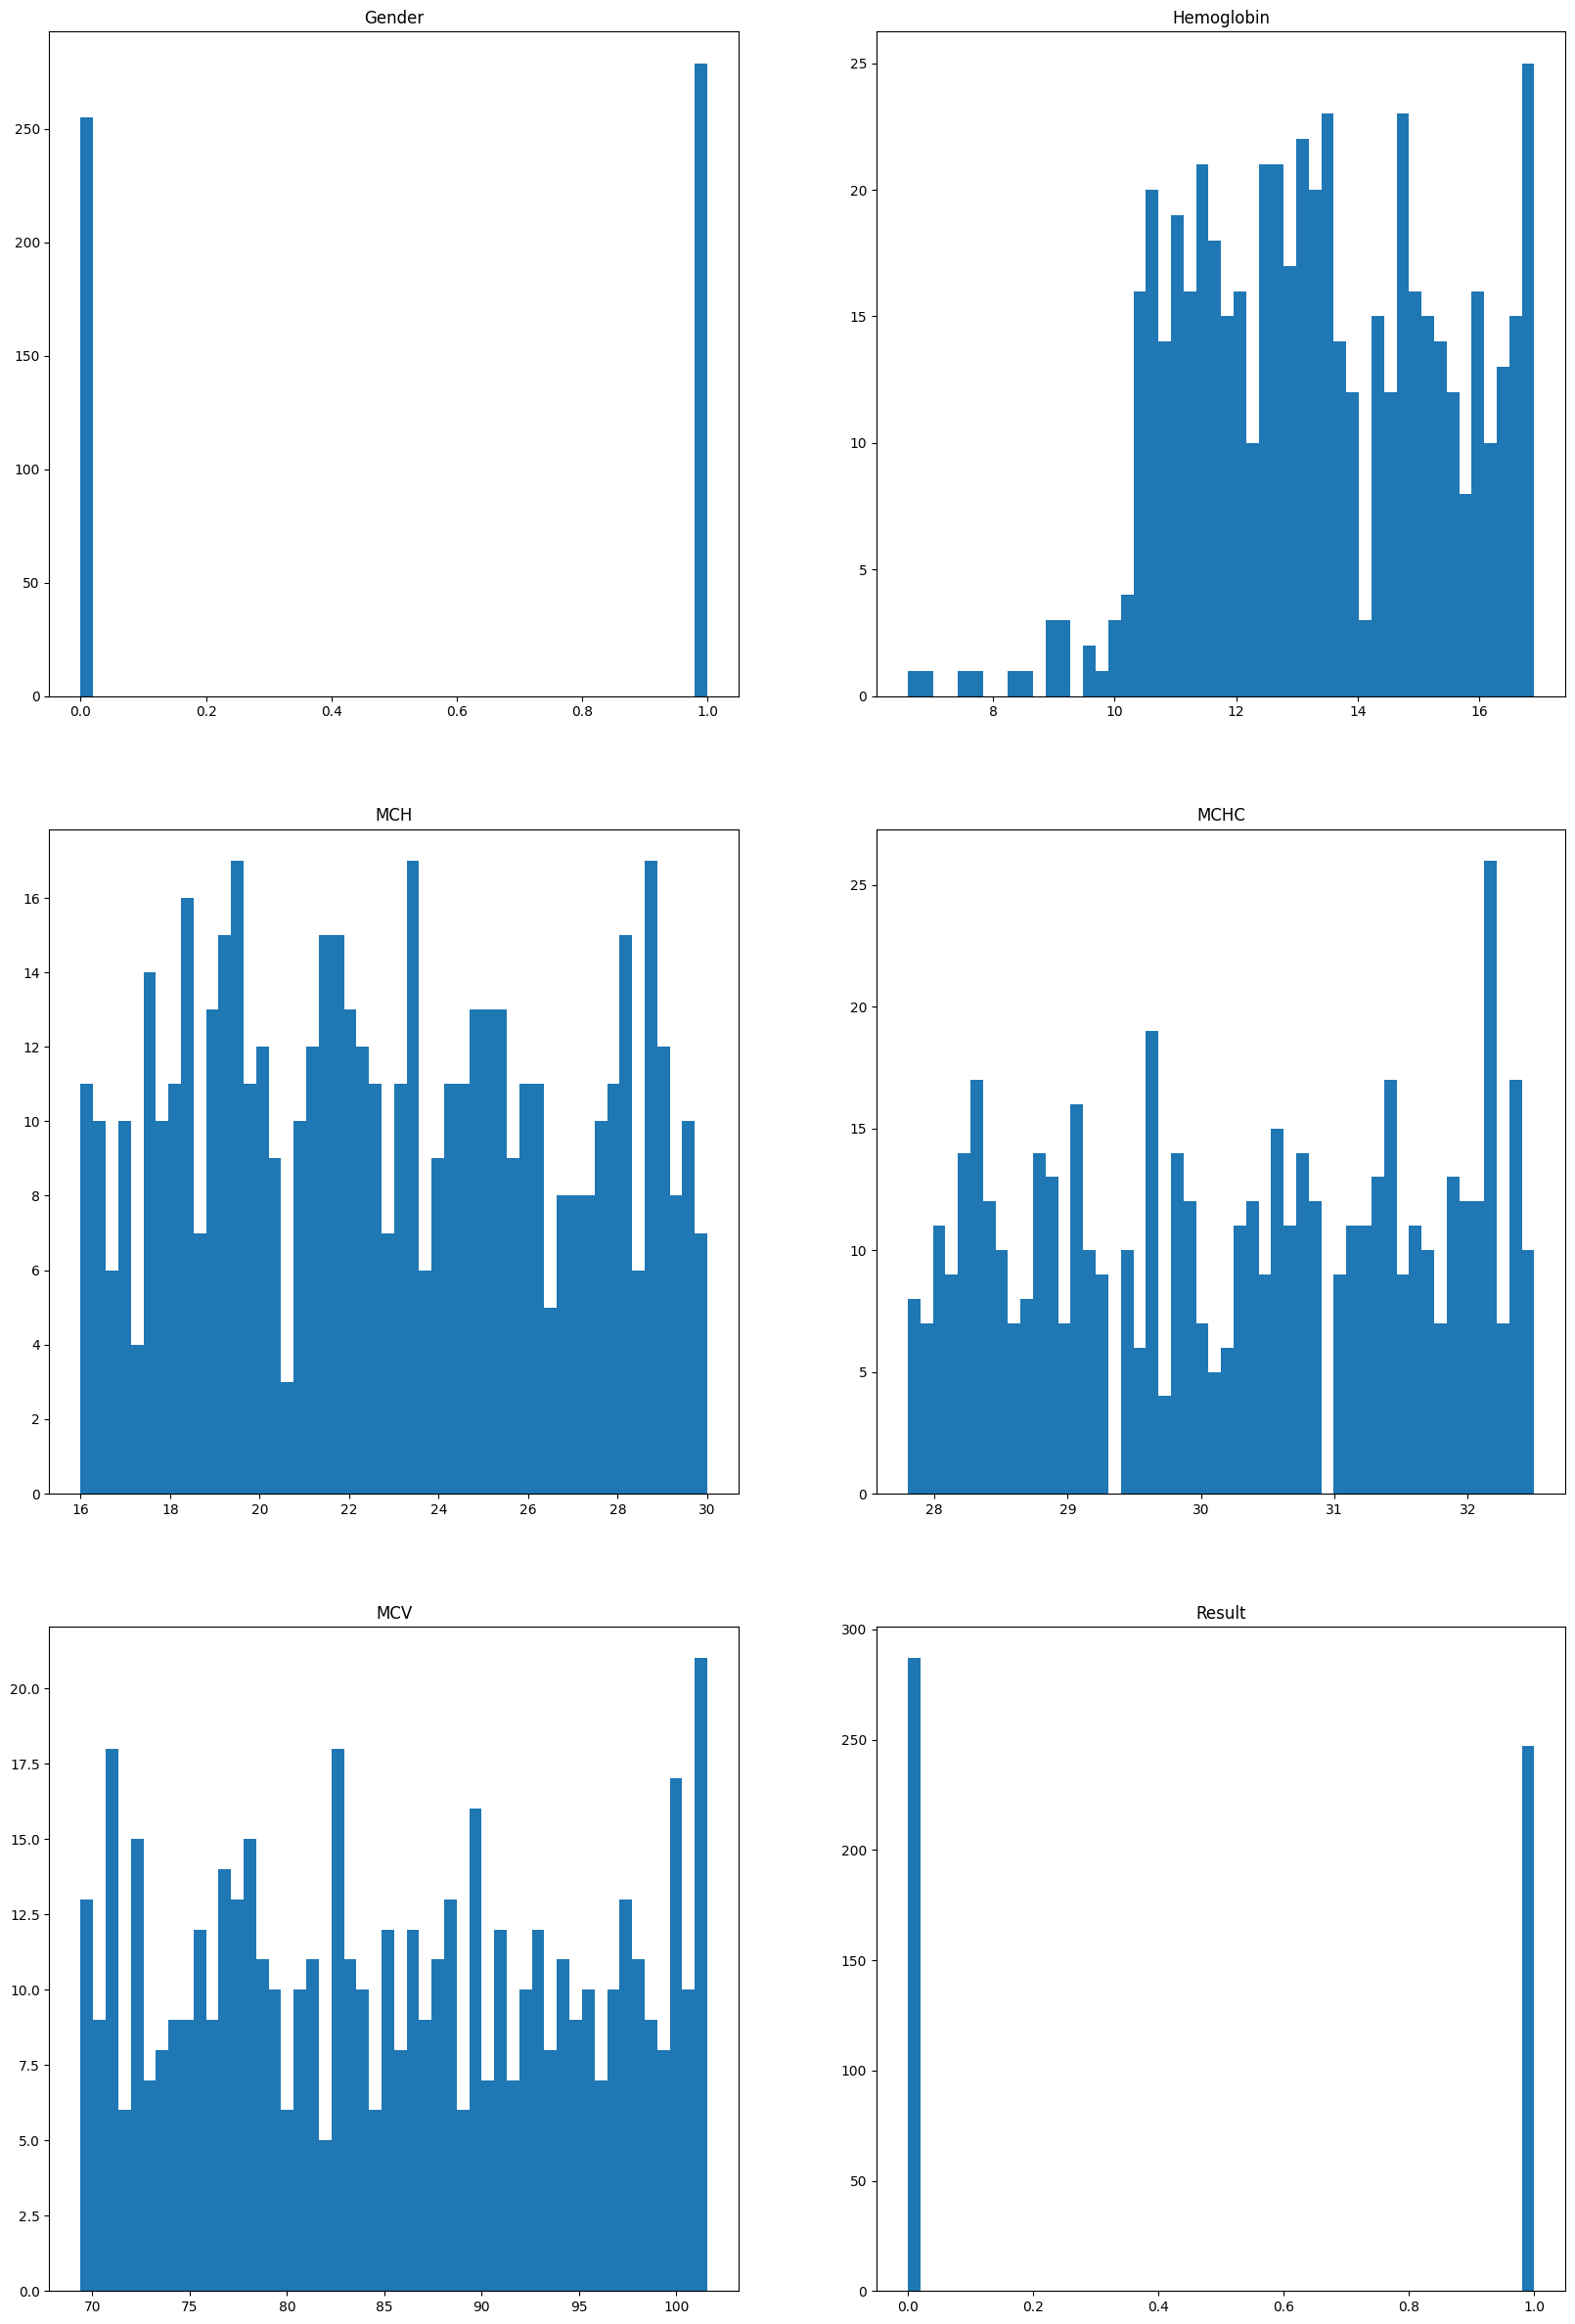

In [ ]:
rows = int(np.ceil(np.sqrt(len(df.columns))))
cols = int(np.ceil(len(df.columns) / rows))
fig, ax = plt.subplots(rows, cols, figsize=(10*cols, 10*rows))
ax = ax.flatten()
for idx , column in enumerate(df.columns):
  ax[idx].hist(x = df[column] , bins=50)
  ax[idx].set_title(column)
plt.show()

Berdasarkan sebaran data pada histogram, fitur numerik seperti Hemoglobin, MCH, MCHC, dan MCV menunjukkan distribusi yang tidak normal dan rentang nilai yang bervariasi. Oleh karena itu, normalisasi data sangat disarankan agar model machine learning dapat mempelajari pola dengan lebih adil dan optimal, terutama jika menggunakan algoritma yang sensitif terhadap skala data.

## Membuat Heat map untuk visualisasi korelasi antar kolom dalam dataset

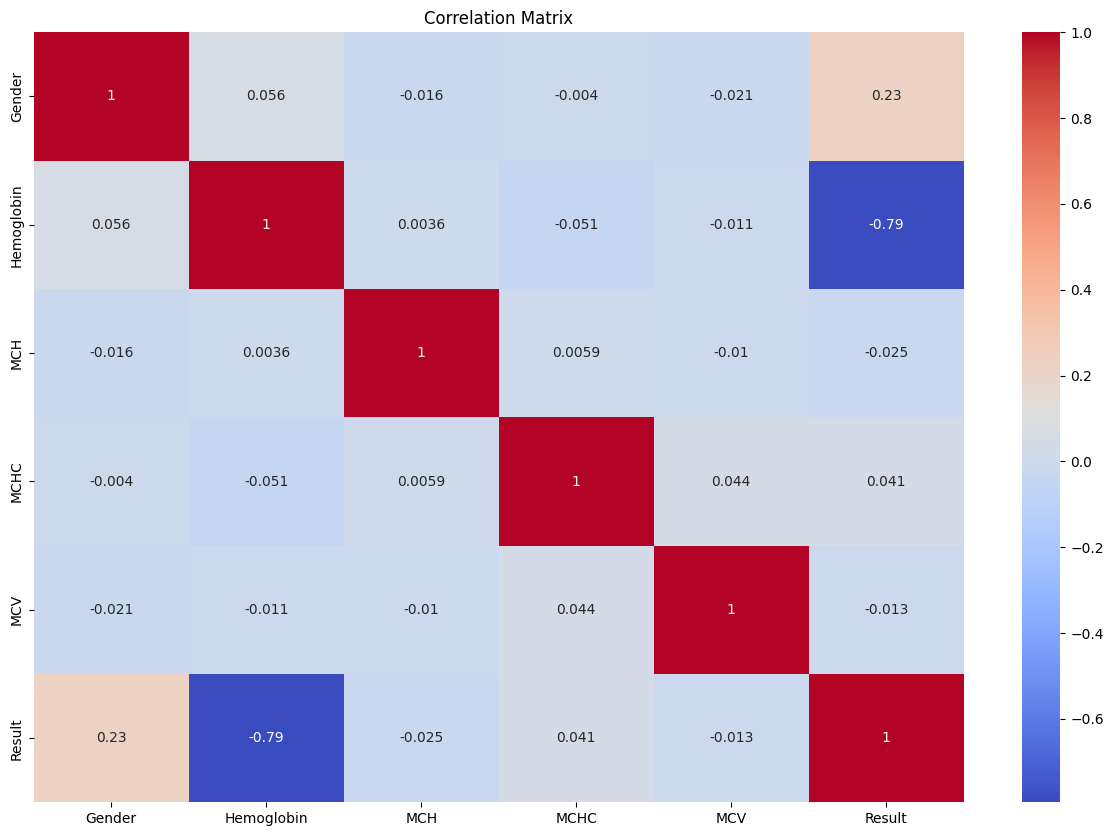

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Berdasarkan hasil visualisasi korelasi (heatmap), dapat dilihat bahwa sebagian besar fitur dalam dataset anemia memiliki tingkat korelasi yang rendah terhadap label target Result. Korelasi tertinggi ditemukan antara fitur `Gender dengan Result sebesar 0.23, sedangkan korelasi terendah adalah antara Hemoglobin dengan Result sebesar -0.79. Nilai korelasi negatif yang cukup kuat ini menunjukkan bahwa semakin rendah nilai hemoglobin, semakin besar kemungkinan seseorang mengalami anemia, yang secara medis memang relevan.

Fitur-fitur lain seperti MCH, MCHC, dan MCV menunjukkan korelasi sangat lemah terhadap Result, dengan nilai korelasi yang mendekati nol. Hal ini menandakan bahwa tidak ada hubungan linier yang signifikan antara fitur-fitur tersebut dengan label target. Namun, meskipun korelasinya rendah secara linier, fitur-fitur ini tetap dapat memberikan kontribusi terhadap performa model, terutama jika menggunakan algoritma pembelajaran mesin yang mampu menangkap pola non-linier seperti Random Forest atau Neural Network.

Secara umum, hasil korelasi ini menunjukkan bahwa fitur Hemoglobin memiliki potensi paling kuat sebagai prediktor utama untuk anemia dalam dataset ini, sedangkan fitur lainnya berperan sebagai pendukung dalam proses klasifikasi. Tidak ada fitur yang perlu dihapus berdasarkan nilai korelasi saja, karena kontribusi fitur bisa lebih kompleks dari sekadar hubungan linier.


Dari proses EDA yang telah dilakukan, didapatkan beberapa insight terkait dengan dataset, yaitu:

* Ditemukan sebanyak 887 data duplikat dari total 1421 baris data, atau sekitar 62% merupakan data yang identik. Penghapusan data duplikat dilakukan untuk menghindari bias pada model serta meningkatkan efisiensi komputasi. Setelah penghapusan, data yang tersisa sebanyak 534 baris unik dan tetap dapat digunakan untuk proses eksplorasi dan pemodelan awal.

* Tidak ditemukan missing value pada dataset ini, sehingga tidak dilakukan tindakan lebih lanjut terkait penanganan data kosong.

* Hasil visualisasi boxplot menunjukkan bahwa sebagian besar kolom seperti MCH, MCHC, dan MCV tidak memiliki outlier ekstrem. Namun, pada kolom Hemoglobin, terdapat satu nilai rendah yang secara statistik termasuk outlier. Nilai ini tidak dihapus karena masih mungkin merepresentasikan kondisi anemia berat yang valid secara medis, dan tetap dipertahankan agar variasi data tetap mencerminkan kondisi nyata.

* Berdasarkan visualisasi pie chart dan bar chart, distribusi label pada kolom Result tampak seimbang antara penderita anemia dan non-anemia. Tidak ditemukan dominasi kelas tertentu dalam jumlah yang signifikan, sehingga kondisi ini tidak menimbulkan permasalahan imbalance pada tahap pemodelan.

* Berdasarkan visualisasi histogram, distribusi nilai pada beberapa fitur numerik seperti Hemoglobin, MCH, MCHC, dan MCV tidak mengikuti pola distribusi normal. Beberapa fitur menunjukkan pola right skewed dan ada juga yang left skewed. Dengan kondisi distribusi seperti ini, proses normalisasi diterapkan untuk menyamakan skala dan pola sebaran nilai antar fitur sebelum masuk ke tahap pelatihan model.

* Dari hasil visualisasi heatmap, korelasi antar fitur dan label target Result menunjukkan nilai yang bervariasi. Korelasi tertinggi yaitu antara Gender dan Result sebesar 0.23, sedangkan korelasi terendah adalah antara Hemoglobin dan Result sebesar -0.79. Korelasi negatif yang kuat pada hemoglobin menunjukkan hubungan yang relevan secara medis, yaitu semakin rendah kadar hemoglobin, semakin besar kemungkinan seseorang mengalami anemia. Sementara fitur lain seperti MCH, MCHC, dan MCV memiliki korelasi yang mendekati nol terhadap label Result, namun tetap dapat menjadi bagian dari input model karena beberapa algoritma mampu menangkap pola non-linier dari data.



#Data Preparation

## Menhapus Data Duplikat

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

print(df.duplicated().sum())

print("Contents of the DataFrame after dropping duplicates:")
display(df.head())

print(f"Updated number of rows: {df.shape[0]}")


0
Contents of the DataFrame after dropping duplicates:


,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


Updated number of rows: 534


Setelah data duplikat dihapus, dataset menjadi lebih bersih dan siap digunakan untuk tahap berikutnya. Langkah selanjutnya adalah memisahkan variabel independen (fitur) dan variabel dependen (target) ke dalam dua variabel terpisah, yaitu X untuk fitur dan y untuk label. Pemisahan ini penting sebagai persiapan sebelum proses pelatihan model dilakukan.


## Memisahkan antara variabel independen dan variabel dependen serta splitting data

In [ ]:
X = df.drop(columns='Result')
y = df['Result']

Data kemudian dipisahkan menjadi variabel independen dan dependen. Variabel X berisi fitur atau data independen, sedangkan variabel y memuat label atau data dependen yang akan diprediksi. Pemisahan ini dilakukan untuk mempersiapkan data sebelum masuk ke tahap pelatihan model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Pembagian data dilakukan dengan rasio 80% untuk data latih dan 20% untuk data uji. Pemisahan ini bertujuan agar model memiliki cukup data untuk belajar sekaligus menyediakan data yang cukup untuk evaluasi. Dalam proses ini, distribusi kelas pada variabel target dijaga tetap seimbang menggunakan teknik stratifikasi, sehingga proporsi label pada data latih dan data uji tetap konsisten dengan data aslinya. Pengacakan dilakukan secara terkontrol agar hasil pembagian data tetap konsisten dan dapat diulang kembali.

## Normalisasi data (Feature Scalling)

In [ ]:
Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

Proses normalisasi pada data latih untuk ntuk menyamakan skala atau rentang nilai antar fitur dalam dataset, sehingga algoritma machine learning bisa memprosesnya secara adil dan efisien.

Hasil Akhir Data Preparation:

Penghapusan Duplikat

1.   Sebanyak 887 data duplikat berhasil dihapus dari total 1421 data, menyisakan 534 data unik. Penghapusan ini penting dilakukan untuk menjaga kualitas data dan menghindari bias dalam pelatihan model.
2.   Pemisahan Variabel
Dataset dipisahkan menjadi dua bagian, yaitu X sebagai variabel independen (fitur) dan y sebagai variabel dependen (label). Langkah ini dilakukan agar proses pelatihan model menjadi lebih terstruktur.
3. Splitting Data
Data dibagi menjadi 80% data latih dan 20% data uji menggunakan fungsi train_test_split, dengan teknik stratifikasi agar distribusi kelas tetap seimbang. Pengacakan dilakukan secara terkontrol (random_state) agar pembagian data dapat direproduksi.
4. Normalisasi Data
Data latih dan data uji dinormalisasi menggunakan metode MinMaxScaler. Normalisasi ini dilakukan untuk menyamakan skala antar fitur sehingga model dapat belajar secara lebih adil dan efisien.

# Modeling & Evaluasi

## Membuat fungsi untuk evaluasi performa dari model

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision Score : {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall Score : {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print("-"*50)
    sns.heatmap(confusion_matrix(y_test , y_pred) , annot = True ,cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print("-"*50)

Fungsi evaluate_model() digunakan untuk mengevaluasi performa model machine learning secara praktis. Fungsi ini menampilkan nilai akurasi, precision, recall, F1-score, dan visualisasi confusion matrix, sehingga memudahkan dalam membandingkan hasil dari beberapa model.

## Melakukan proses training pada model KNN, RF, SVM, dan XGBoost menggunakan data hasil splitting.

In [ ]:
from xgboost import XGBClassifier
model_knn = KNeighborsClassifier()
model_rf = RandomForestClassifier(n_estimators=300,max_depth=2,random_state=42)
model_svm = SVC()
model_xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, eval_metric='logloss')


Dilatih empat model klasifikasi, yaitu:
1.   K-Nearest Neighbors (KNN)
2.   Random Forest
3.   SVM
4.   XGboost

Keempat model ini akan dievaluasi menggunakan empat metrik evaluasi, yaitu:
1.   Akurasi
2.   Precision
3.   Recall
4.   F1-Score

Pada tahap ini, tidak dilakukan hyperparameter tuning. Tujuannya adalah untuk membandingkan performa awal dari masing-masing model dan memilih model terbaik yang akan digunakan dalam proses prediksi data.





## Menampilkan evaluasi dari hasil latih pada masing-masing model

KNN
Accuracy: 0.92
Precision Score : 0.92
Recall Score : , 0.92
F1 Score: 0.92
--------------------------------------------------


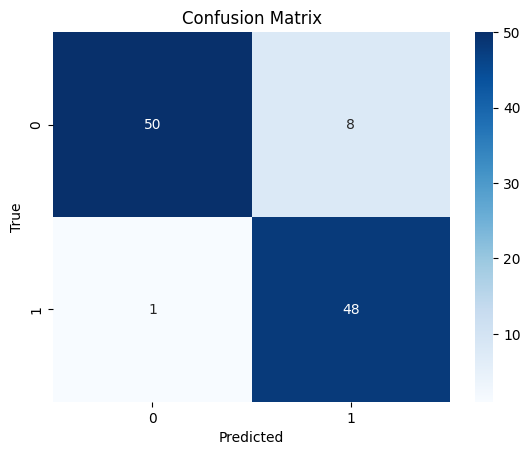

--------------------------------------------------
Random Forest
Accuracy: 0.93
Precision Score : 0.94
Recall Score : , 0.93
F1 Score: 0.93
--------------------------------------------------


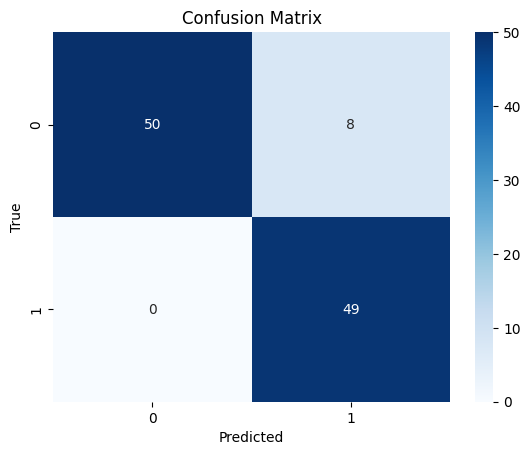

--------------------------------------------------
SVM
Accuracy: 0.93
Precision Score : 0.94
Recall Score : , 0.93
F1 Score: 0.93
--------------------------------------------------


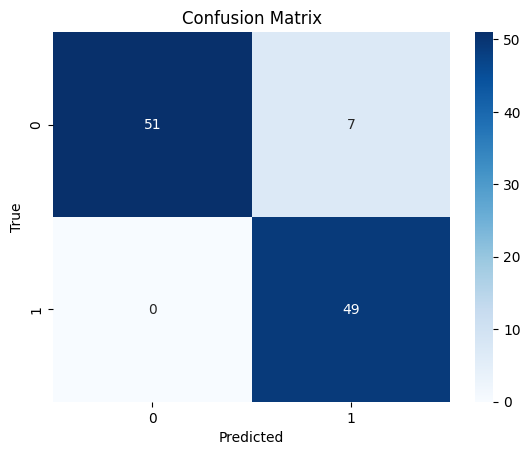

--------------------------------------------------
Gradient XGBoosting
Accuracy: 1.00
Precision Score : 1.00
Recall Score : , 1.00
F1 Score: 1.00
--------------------------------------------------


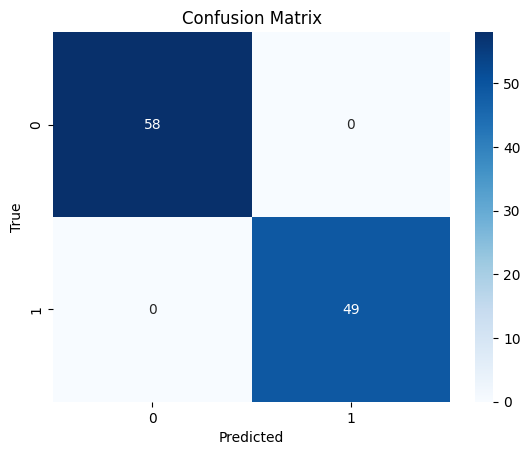

--------------------------------------------------


In [ ]:
print("KNN")
evaluate_model(model_knn, X_train , y_train, X_test, y_test)
print("Random Forest")
evaluate_model(model_rf, X_train , y_train, X_test, y_test)
print("SVM")
evaluate_model(model_svm, X_train , y_train, X_test, y_test)
print("Gradient XGBoosting")
evaluate_model(model_xgb, X_train, y_train, X_test, y_test)


## 1. K-Nearest Neighbors (KNN)

### Deskripsi:

KNN adalah algoritma klasifikasi berbasis instance-based learning. Ketika memprediksi, KNN akan mencari k tetangga terdekat dari data uji, kemudian menentukan kelas mayoritas dari tetangga-tetangga tersebut.

### Rumus (Jarak Euclidean):

$d(x, x_i) = \sqrt{\sum_{j=1}^{n} (x_j - x_{ij})^2}$

**Keterangan:**

* \$d(x, x\_i)\$ : Jarak antara titik uji \$x\$ dan titik data latih ke-\$i\$
* \$x\$ : Vektor fitur data uji
* \$x\_i\$ : Vektor fitur data latih
* \$n\$ : Jumlah fitur

### Parameter:

* n_neighbors=5
* weights='uniform'
* metric='minkowski', p=2

### Kelebihan:

* Sederhana, mudah diimplementasikan
* Tidak butuh pelatihan (lazy learner)
* Cocok untuk dataset kecil

### Kekurangan:

* Lambat saat jumlah data besar
* Sensitif terhadap outlier dan skala fitur
* Butuh normalisasi data

---

## 2. Random Forest

### Deskripsi:

Random Forest adalah algoritma ensemble berbasis banyak decision tree. Setiap pohon dilatih dari subset data secara acak, dan prediksi akhir didapat melalui voting mayoritas.

### Rumus (Voting Mayoritas):

$\hat{y} = \text{mode}(T_1(x), T_2(x), \ldots, T_k(x))$

**Keterangan:**

* \$T\_i(x)\$ : Hasil prediksi tree ke-\$i\$
* \$\hat{y}\$ : Hasil voting akhir

### Parameter:

* n_estimators=300
* max_depth=2
* random_state=42

### Kelebihan:

* Tahan terhadap overfitting
* Cocok untuk data dengan banyak fitur
* Memberikan informasi pentingnya fitur

### Kekurangan:

* Lebih kompleks dan lambat dibanding decision tree tunggal
* Kurang interpretatif
* Bisa boros memori

---

## 3. Support Vector Machine (SVM)

### Deskripsi:

SVM bekerja dengan mencari hyperplane optimal yang memisahkan kelas dengan margin terbesar. Dapat menggunakan kernel non-linear untuk data kompleks.

### Rumus (Linear SVM):

$\min_{w,b} \frac{1}{2} \|w\|^2 \quad \text{dengan syarat: } y_i(w \cdot x_i + b) \geq 1$

### Parameter:

* C=1.0
* kernel='rbf'
* gamma='scale'

### Kelebihan:

* Akurat pada data berdimensi tinggi
* Bisa menangani data non-linear
* Cocok untuk klasifikasi biner

### Kekurangan:

* Waktu pelatihan lama pada data besar
* Parameter harus dituning dengan hati-hati
* Sulit diinterpretasi

---

## 4. Gradient Boosting (XGBoost)

### Deskripsi:

XGBoost adalah algoritma Gradient Boosting yang sangat cepat dan efisien. Setiap model baru dibangun untuk memperbaiki kesalahan dari model sebelumnya dengan pendekatan iteratif.

### Rumus:

$F_{m}(x) = F_{m-1}(x) + \gamma_m h_m(x)$

**Keterangan:**

* \$F\_{m}(x)\$ : Model akhir pada iterasi ke-\$m\$
* \$h\_m(x)\$ : Weak learner (decision tree kecil)
* \$\gamma\_m\$ : Learning rate

### Parameter:

* n_estimators=100
* learning_rate=0.1
* max_depth=3
* use_label_encoder=False

### Kelebihan:

* Akurasi tinggi
* Efisien secara waktu dan memori
* Dapat menangani missing value dan outlier

### Kekurangan:

* Rentan overfitting jika tidak dikontrol
* Butuh tuning parameter optimal
* Tidak secepat Random Forest dalam inferensi

---

## **Evaluasi Model**

### **Metrik Evaluasi**

1. **Accuracy**
   $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$
2. **Precision**
   $Precision = \frac{TP}{TP + FP}$
3. **Recall**
   $Recall = \frac{TP}{TP + FN}$
4. **F1-Score**
   $F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$

   #### Keterangan
   - $TP$ : jumlah prediksi benar untuk nilai positif oleh model
   - $TN$ : jumlah prediksi benar untuk nilai negatif oleh model
   - $FP$ : jumlah prediksi salah untuk nilai positif oleh model
   - $FN$ : jumlah prediksi salah untuk nilai negatif oleh model

### **Hasil Evaluasi**

| Model             | Accuracy | Precision | Recall   | F1-Score |
| ----------------- | -------- | --------- | -------- | -------- |
| KNN               | 0.92     | 0.92      | 0.92     | 0.92     |
| Random Forest     | 0.93     | 0.94      | 0.93     | 0.93     |
| SVM               | 0.93     | 0.94      | 0.93     | 0.93     |
| Gradient Boosting | **1.00** | **1.00**  | **1.00** | **1.00** |

### **Model Terbaik**

Model terbaik berdasarkan metrik evaluasi adalah **Gradient Boosting (XGBoost)**. Model ini mencetak nilai sempurna (1.00) pada semua metrik evaluasi. Hal ini menunjukkan bahwa model sangat baik dalam mengklasifikasikan data tanpa kesalahan.

Model ini dipilih karena:

* Akurasi tinggi dan konsisten
* Kinerja sangat baik dibandingkan model lain
* Sensitivitas dan presisi yang seimbang

### **Keterkaitan dengan Business Understanding**

1. **Apakah sudah menjawab pertanyaan problem statement?**
   Ya. Model Gradient Boosting mampu memprediksi kondisi anemia dengan sangat akurat berdasarkan fitur non-klinik, sesuai tujuan awal penelitian.

2. **Apakah goals tercapai?**
   Ya. Tujuan membangun model klasifikasi anemia berbasis machine learning dengan metrik evaluasi tinggi telah tercapai. XGBoost memberikan performa optimal.

3. **Apakah solusi yang diterapkan berpengaruh?**
   Sangat berpengaruh. Perbandingan beberapa model memberikan pemahaman yang lebih menyeluruh tentang performa algoritma. Data yang diproses dengan baik dan pemilihan model yang tepat berkontribusi pada keberhasilan ini.

